In [1]:
import pandas as pd
import os
import numpy as nppi
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [1]:
"@multonpartners.com" == "@multonpartners.com"

True

In [1]:
for el in 'welcome@multonpartners.com':
    print(el, ((el >= 'a' and el <= 'z') or (el >= 'A' and el <= 'Z')))

w True
e True
l True
c True
o True
m True
e True
@ False
m True
u True
l True
t True
o True
n True
p True
a True
r True
t True
n True
e True
r True
s True
. False
c True
o True
m True


# Задача
*Суть задачи*

*Что нужно сделать*
1) Построить модель машинного обучения
Необходимо создать модель, которая по входным параметрам будет предсказывать цену автомобиля.

2) Проанализировать динамику изменения стоимости
Нужно изучить, как стоимость автомобиля меняется с течением времени. Для разных производителей или моделей темпы обесценивания могут отличаться. Можно сгруппировать автомобили в кластеры с похожим поведением и описать свойства этих кластеров.

*Оформить результаты*
Результаты работы нужно представить в виде презентации (PowerPoint) или Jupyter-ноутбука. В отчёте следует показать:

- Как вы тестировали разные модели,

- Какую модель выбрали и почему,

- Какие метрики использовали,

- Какие параметры включили в модель,

- Какие выводы сделали по амортизации.

Технические детали
Для анализа рекомендуется использовать Python и библиотеки: matplotlib, seaborn, sklearn.


In [2]:
data = pd.read_csv('cars.csv', sep=';', encoding='UTF-16')

In [3]:
display(data)

,brand,currency,description,model,price,url,year,Город,Коробка передач,Кузов,"Объем двигателя, л",Привод,Растаможен,Руль,Цвет,Пробег,Наличие,VIN
0,Mercedes-Benz,₸,"полный электропакет , налог уплачен, техосмот...",GL 550,5800000,https://kolesa.kz/a/show/10235750,2008,Актау,типтроник,внедорожник,5.5 (бензин),полный привод,Да,слева,черный металлик,NaN,NaN,NaN
1,BMW,₸,"тонировка , обогрев зеркал, хрустальная оптик...",X5,5500000,https://kolesa.kz/a/show/10269314,2009,Нур-Султан (Астана),автомат,кроссовер,4.8 (бензин),полный привод,Да,слева,черный,170 км,NaN,NaN
2,Mercedes-Benz,₸,"лонг, состояние нового авто немец газ-бензин п...",S 350,7770000,https://kolesa.kz/a/show/1063798,2006,Алматы,типтроник,седан,3.5 (бензин),NaN,Да,слева,черный,60 000 км,NaN,NaN
3,Mitsubishi,₸,"литые диски, тонировка, люк , хрустальная опт...",Outlander,3200000,https://kolesa.kz/a/show/10695701,2003,Семей,типтроник,кроссовер,2.4 (бензин),полный привод,Да,слева,серебристый металлик,120 000 км,NaN,NaN
4,Ретро-автомобили,₸,"налог уплачен, техосмотр пройден, вложений не ...","ГАЗ 21 ""Волга""",3900000,https://kolesa.kz/a/show/10852142,1970,Алматы,механика,седан,2.4 (бензин),задний привод,Да,слева,черный,1 200 км,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108531,Mercedes-Benz,₸,"люк , ксенон, биксенон, дневные ходовые огни ...",G 500,8000000,https://kolesa.kz/a/show/95800950,1998,Алматы,автомат,внедорожник,5 (бензин),полный привод,Да,слева,черный металлик,NaN,NaN,NaN
108532,Mercedes-Benz,₸,2006 Mercedes-Benz s65amg. Original. Long. V-1...,S 65 AMG,8700000,https://kolesa.kz/a/show/95801019,2006,Алматы,типтроник,седан,6 (бензин),задний привод,Да,слева,белый,112 000 км,NaN,NaN
108533,Mercedes-Benz,₸,"люк, литые диски, ветровики, тонировка , ксен...",GL 550,8400000,https://kolesa.kz/a/show/95801055,2009,Алматы,автомат,внедорожник,5.5 (бензин),полный привод,Да,слева,черный,NaN,NaN,NaN
108534,Toyota,₸,Авто в идеальном состоянии. Кузов полностью в ...,4Runner,8500000,https://kolesa.kz/a/show/95801158,2008,Нур-Султан (Астана),автомат,внедорожник,4 (газ-бензин),полный привод,Да,слева,черный металлик,230 000 км,NaN,NaN


In [4]:
display(data.describe())

,price,year
count,1.085360e+05,108536.000000
mean,3.627690e+06,2003.358231
std,5.502069e+06,8.957116
min,5.500000e+02,1913.000000
25%,1.000000e+06,1996.000000
50%,2.000000e+06,2004.000000
75%,4.000000e+06,2011.000000
max,2.600000e+08,2019.000000


Тут видно что машины макс 2019г. наверное выборка собиралась на момент 2019 года. Иначе объяснить цены 260млн на 2019г у меня нет идей.
Какие-то ретро данные.

ВАЖНО! Я не уверен в контексте и в ценах на авто на 2019 год, поэтому примем как должно такие цены. Сейчас новые аналоги стоят в мск примерно таких же денег так что думаю что это не выбросы.

Однако цены где 550тг за машину могу быть выбросами, но люди опять же делают объявления чисто обмен с какой-то ценой которая может быть случайной, или отдавать старые авто (в добрые руки как говорится)

In [5]:
display(data.shape)
display(data.isna().sum() / data.shape[0])

(108536, 18)

brand                 0.000000
currency              0.000000
description           0.048426
model                 0.000378
price                 0.000000
url                   0.000000
year                  0.000000
Город                 0.000000
Коробка передач       0.000000
Кузов                 0.000000
Объем двигателя, л    0.000258
Привод                0.126428
Растаможен            0.000000
Руль                  0.000258
Цвет                  0.098345
Пробег                0.402816
Наличие               0.961644
VIN                   0.957047
dtype: float64

Сразу можно заметить 2 не особо интересные фичи у которых слишком много nan -> удалим их в процессе

In [6]:
data.columns

Index(['brand', 'currency', 'description', 'model', 'price', 'url', 'year',
       'Город', 'Коробка передач', 'Кузов', 'Объем двигателя, л', 'Привод',
       'Растаможен', 'Руль', 'Цвет', 'Пробег', 'Наличие', 'VIN'],
      dtype='object')

In [7]:
def preproc_data(df):

    df[['engine_volume', 'engine_type']] = df['Объем двигателя, л'].str.extract(r'([\d.]+)\s*\(([^)]+)\)')
    df['engine_volume'] = pd.to_numeric(data['engine_volume'])
    df[['color_base', 'metalic']] = df['Цвет'].str.split(' ', n=1, expand=True)
    df['metalic'] = df['metalic'].replace('металлик', 1).fillna(0).astype(int)
    df['Пробег'] = df['Пробег'].str.replace(r'\D', '', regex=True).replace('', np.nan).astype(float)
    df['description_len'] = df['description'].str.len()

    columns_to_drop = [
        'Объем двигателя, л',
        'Цвет',
        'currency',
        'url',
        'VIN',
        'Наличие'
    ]

    cat_features = ['brand',
                'model',
                'Город',
                'Коробка передач',
                'Кузов',
                'Привод',
                'Растаможен',
                'Руль',
                'engine_type',
                'color_base',
                'metalic'
    ]

    return df, columns_to_drop, cat_features

In [8]:
data, COLUMNS_TO_DROP, CAT_FEATURES = preproc_data(data)

C:\Users\zloif\AppData\Local\Temp\ipykernel_28428\1079951102.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['metalic'] = df['metalic'].replace('металлик', 1).fillna(0).astype(int)


In [9]:
data.drop(COLUMNS_TO_DROP, axis=1, inplace=True)

In [10]:
display(data)

,brand,description,model,price,year,Город,Коробка передач,Кузов,Привод,Растаможен,Руль,Пробег,engine_volume,engine_type,color_base,metalic,description_len
0,Mercedes-Benz,"полный электропакет , налог уплачен, техосмот...",GL 550,5800000,2008,Актау,типтроник,внедорожник,полный привод,Да,слева,NaN,5.5,бензин,черный,1,74.0
1,BMW,"тонировка , обогрев зеркал, хрустальная оптик...",X5,5500000,2009,Нур-Султан (Астана),автомат,кроссовер,полный привод,Да,слева,170.0,4.8,бензин,черный,0,708.0
2,Mercedes-Benz,"лонг, состояние нового авто немец газ-бензин п...",S 350,7770000,2006,Алматы,типтроник,седан,NaN,Да,слева,60000.0,3.5,бензин,черный,0,122.0
3,Mitsubishi,"литые диски, тонировка, люк , хрустальная опт...",Outlander,3200000,2003,Семей,типтроник,кроссовер,полный привод,Да,слева,120000.0,2.4,бензин,серебристый,1,706.0
4,Ретро-автомобили,"налог уплачен, техосмотр пройден, вложений не ...","ГАЗ 21 ""Волга""",3900000,1970,Алматы,механика,седан,задний привод,Да,слева,1200.0,2.4,бензин,черный,0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108531,Mercedes-Benz,"люк , ксенон, биксенон, дневные ходовые огни ...",G 500,8000000,1998,Алматы,автомат,внедорожник,полный привод,Да,слева,NaN,5.0,бензин,черный,1,1197.0
108532,Mercedes-Benz,2006 Mercedes-Benz s65amg. Original. Long. V-1...,S 65 AMG,8700000,2006,Алматы,типтроник,седан,задний привод,Да,слева,112000.0,6.0,бензин,белый,0,511.0
108533,Mercedes-Benz,"люк, литые диски, ветровики, тонировка , ксен...",GL 550,8400000,2009,Алматы,автомат,внедорожник,полный привод,Да,слева,NaN,5.5,бензин,черный,0,546.0
108534,Toyota,Авто в идеальном состоянии. Кузов полностью в ...,4Runner,8500000,2008,Нур-Султан (Астана),автомат,внедорожник,полный привод,Да,слева,230000.0,4.0,газ-бензин,черный,1,387.0


# Первую проверку делаем без обработки текста

In [12]:
from catboost import Pool, CatBoostRegressor

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
FEATURES = [col for col in data.columns if col not in  ['price', 'description']]
TARGET = ['price']

In [15]:
for col in CAT_FEATURES:
    data[col] = data[col].fillna('unk')

In [16]:
X, y = data[FEATURES], data[TARGET]

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=111)

In [18]:
len(CAT_FEATURES)

11

In [19]:
data.columns.__len__()

17

In [20]:
train_pool = Pool(X_train, y_train, cat_features=CAT_FEATURES)
valid_pool = Pool(X_test, y_test, cat_features=CAT_FEATURES)

In [21]:
model = CatBoostRegressor(random_state = 111)

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=100)
y_pred = model.predict(X_test)

Learning rate set to 0.102628
0:	learn: 5043257.3987703	test: 5507308.6931082	best: 5507308.6931082 (0)	total: 228ms	remaining: 3m 47s
100:	learn: 1806177.9183795	test: 2586235.8893756	best: 2586235.8893756 (100)	total: 10.2s	remaining: 1m 30s
200:	learn: 1591382.2883291	test: 2374858.8823810	best: 2374858.8823810 (200)	total: 18.6s	remaining: 1m 13s
300:	learn: 1450854.1632487	test: 2274207.7221804	best: 2274207.7221804 (300)	total: 27s	remaining: 1m 2s
400:	learn: 1347873.9023324	test: 2203436.0094943	best: 2203436.0094943 (400)	total: 35.6s	remaining: 53.2s
500:	learn: 1269436.6752083	test: 2110986.4878497	best: 2110986.4878497 (500)	total: 44.1s	remaining: 43.9s
600:	learn: 1202203.7530483	test: 2063363.2242387	best: 2063363.2242387 (600)	total: 52.7s	remaining: 35s
700:	learn: 1160688.1583729	test: 2044294.8747967	best: 2044293.2395741 (697)	total: 1m 1s	remaining: 26.1s
800:	learn: 1125247.4680178	test: 2026341.2992503	best: 2026204.6611576 (782)	total: 1m 9s	remaining: 17.4s
900

In [24]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 582570.7750892144


Ошибка достаточно большая, но в рамках предсказания цен на машины выражены в тенге. Особенно при средней цене 3.6 млн ошибка в 16%, относительно среднего

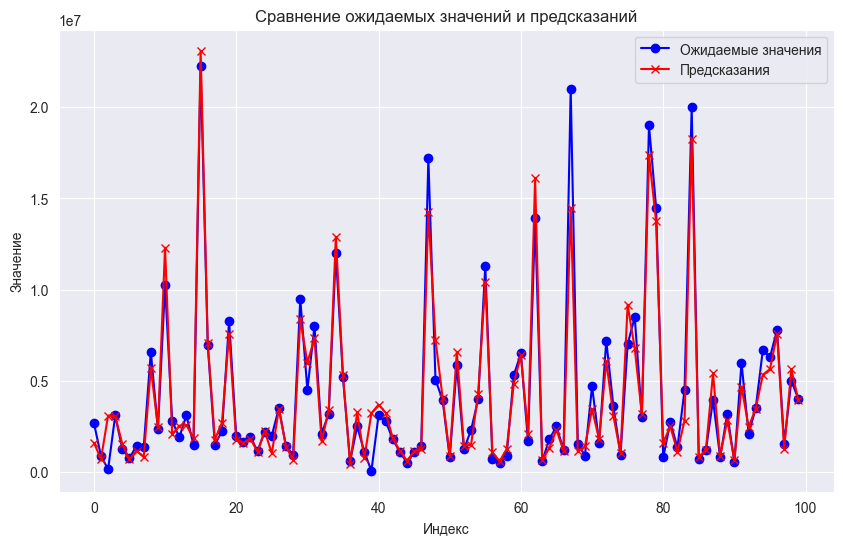

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[1000:1100], label='Ожидаемые значения', color='blue', linestyle='-', marker='o')
plt.plot(y_pred[1000:1100], label='Предсказания', color='red', linestyle='-', marker='x')

plt.title('Сравнение ожидаемых значений и предсказаний')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

Предоставленных данных уже хватает чтобы давать какие-то адекватные предсказания, судя по графику это не простое угадывание

In [26]:
data['price'].mean()

np.float64(3627689.5619333675)

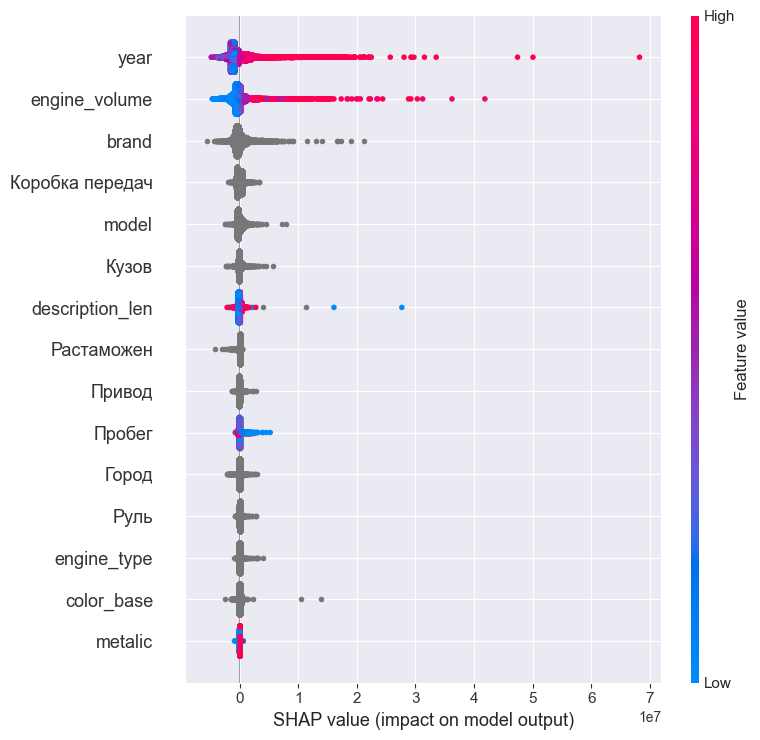

In [27]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Из важных фичей:
year - чем новее авто тем больше модель склоняется в большую цену.
engine_volume - объем движка - чем больше тем больше цена.
brand - кат фича, но тут скорее очевидно, что чем дороже сегмент машины, тем дороже она будет на вторичном рынке.
Коробка передач - тут в принципе тоже категория, но в целом авто с разными КП различаются по цене.

Так же длина описания, предоставленного продавцом к объявлению, частично влияет на цену. Чем меньше описание, тем меньше цена. Возможно связано с тем, что если салон выставит авто у них описание будет больше чем у простого человека, но и цена тоже больше)

Если очень сильно хочется, можно расчитать shap через OHE для категорий. Но область достаточно простая и нативно понятно как наиболее важные из категорий влияют на цену.

In [28]:
feature_importances = model.get_feature_importance(train_pool)
feature_importance_df = pd.DataFrame({
    'Feature': X_train[FEATURES].columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [29]:
feature_importance_df

,Feature,Importance
2,year,40.750483
10,engine_volume,29.108761
0,brand,13.772787
1,model,3.514460
5,Кузов,2.752963
14,description_len,2.081294
9,Пробег,1.677484
4,Коробка передач,1.603485
3,Город,1.111831
6,Привод,1.008251


# Пробем подключить ещё и эмбединги текстов

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import RussianStemmer

In [32]:
STOPS_RU = set(stopwords.words('russian'))
STOPS_KZ = set(stopwords.words('kazakh'))

In [33]:
stemmer = RussianStemmer()

In [34]:
def preprocess_text_simple(text):
    text = re.sub(r'[^а-яёәғқңөұүһіa-zА-ЯЁӘҒҚҢӨҰҮҺІA-Z0-9 ]', ' ', text.lower())
    tokens = text.split()
    clean_tokens = []
    all_stopwords = STOPS_RU.union(STOPS_KZ)
    for token in tokens:
        if token in all_stopwords or len(token) < 2:
            continue
        if re.search('[а-яё]', token):
            token = stemmer.stem(token)
        clean_tokens.append(token)
    return ' '.join(clean_tokens)

In [35]:
from datetime import datetime

In [36]:
start_time = datetime.now()
data['description_clean'] = data['description'].apply(lambda x: preprocess_text_simple(str(x)))
print(f"Time to process: {datetime.now() - start_time}")

Time to process: 0:01:47.137188


In [37]:
vectorizer = TfidfVectorizer(
    max_features=64,
    ngram_range=(1,2),
    max_df = 0.95,
    min_df = 0.2
)
X_text = vectorizer.fit_transform(data['description_clean'])

In [38]:
X_text = X_text.toarray()

In [39]:
X_text = pd.DataFrame(X_text)

In [40]:
X_text

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.292127,0.364918,0.000000,0.000000,0.000000,0.000000,0.000000,0.352555
1,0.087276,0.125637,0.201133,0.000000,0.000000,0.107127,0.000000,0.000000,0.000000,0.130876,...,0.000000,0.000000,0.083409,0.104192,0.222211,0.118866,0.123672,0.132615,0.089578,0.100662
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.138998,0.000000,0.160164,0.140865,0.196472,0.170613,0.150312,0.197214,0.000000,0.000000,...,0.000000,0.139198,0.132839,0.165939,0.176949,0.000000,0.000000,0.211206,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.254525,0.242896,0.303419,0.000000,0.346151,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108531,0.104999,0.000000,0.000000,0.000000,0.000000,0.128881,0.000000,0.000000,0.244270,0.157452,...,0.148913,0.105151,0.100346,0.125350,0.000000,0.286007,0.148786,0.000000,0.000000,0.121104
108532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
108533,0.105671,0.152117,0.121762,0.107090,0.000000,0.129705,0.000000,0.000000,0.122916,0.158460,...,0.149866,0.105823,0.100988,0.000000,0.269045,0.000000,0.000000,0.000000,0.108458,0.121878
108534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.337552,0.000000,0.000000,0.000000,0.000000,0.000000


Закинул простой tf_idf, можно попробовать BERT на тексты накинуть, чтобы получить больше интересных взаимосвязей, учесть не просто частоту слов.

In [41]:
X, y = data[FEATURES], data[TARGET]

In [42]:
X = X.merge(X_text, left_index=True, right_index=True)

In [43]:
X

,brand,model,year,Город,Коробка передач,Кузов,Привод,Растаможен,Руль,Пробег,...,54,55,56,57,58,59,60,61,62,63
0,Mercedes-Benz,GL 550,2008,Актау,типтроник,внедорожник,полный привод,Да,слева,NaN,...,0.000000,0.000000,0.292127,0.364918,0.000000,0.000000,0.000000,0.000000,0.000000,0.352555
1,BMW,X5,2009,Нур-Султан (Астана),автомат,кроссовер,полный привод,Да,слева,170.0,...,0.000000,0.000000,0.083409,0.104192,0.222211,0.118866,0.123672,0.132615,0.089578,0.100662
2,Mercedes-Benz,S 350,2006,Алматы,типтроник,седан,unk,Да,слева,60000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Mitsubishi,Outlander,2003,Семей,типтроник,кроссовер,полный привод,Да,слева,120000.0,...,0.000000,0.139198,0.132839,0.165939,0.176949,0.000000,0.000000,0.211206,0.000000,0.000000
4,Ретро-автомобили,"ГАЗ 21 ""Волга""",1970,Алматы,механика,седан,задний привод,Да,слева,1200.0,...,0.000000,0.254525,0.242896,0.303419,0.000000,0.346151,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108531,Mercedes-Benz,G 500,1998,Алматы,автомат,внедорожник,полный привод,Да,слева,NaN,...,0.148913,0.105151,0.100346,0.125350,0.000000,0.286007,0.148786,0.000000,0.000000,0.121104
108532,Mercedes-Benz,S 65 AMG,2006,Алматы,типтроник,седан,задний привод,Да,слева,112000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
108533,Mercedes-Benz,GL 550,2009,Алматы,автомат,внедорожник,полный привод,Да,слева,NaN,...,0.149866,0.105823,0.100988,0.000000,0.269045,0.000000,0.000000,0.000000,0.108458,0.121878
108534,Toyota,4Runner,2008,Нур-Султан (Астана),автомат,внедорожник,полный привод,Да,слева,230000.0,...,0.000000,0.000000,0.000000,0.000000,0.337552,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [45]:
train_pool = Pool(X_train, y_train, cat_features=CAT_FEATURES)
valid_pool = Pool(X_test, y_test, cat_features=CAT_FEATURES)

In [46]:
model = CatBoostRegressor(random_state = 111)

In [47]:
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=100)
y_pred = model.predict(X_test)

Learning rate set to 0.102628
0:	learn: 5046407.0819760	test: 5507939.3905898	best: 5507939.3905898 (0)	total: 84.8ms	remaining: 1m 24s
100:	learn: 1824863.3789160	test: 2717474.1964815	best: 2717474.1964815 (100)	total: 9.12s	remaining: 1m 21s
200:	learn: 1559502.2949676	test: 2499547.4730203	best: 2499547.4730203 (200)	total: 18.4s	remaining: 1m 13s
300:	learn: 1427125.7736574	test: 2386767.4406570	best: 2386767.4406570 (300)	total: 27.8s	remaining: 1m 4s
400:	learn: 1335926.3949395	test: 2319790.8038222	best: 2319790.8038222 (400)	total: 37.4s	remaining: 55.8s
500:	learn: 1252177.2771880	test: 2226543.6940309	best: 2224818.9656931 (495)	total: 47s	remaining: 46.9s
600:	learn: 1189910.3645121	test: 2189009.4163964	best: 2188985.0320435 (599)	total: 56.5s	remaining: 37.5s
700:	learn: 1141325.1173774	test: 2162430.5147137	best: 2162430.5147137 (700)	total: 1m 6s	remaining: 28.2s
800:	learn: 1103906.7405836	test: 2147390.3287970	best: 2147364.8274927 (799)	total: 1m 15s	remaining: 18.8s

In [48]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 582425.0625562168


В принципе значимого прироста или каких-то интересных прорывных зависимостей обнаружить не удалось, судя по ошибке

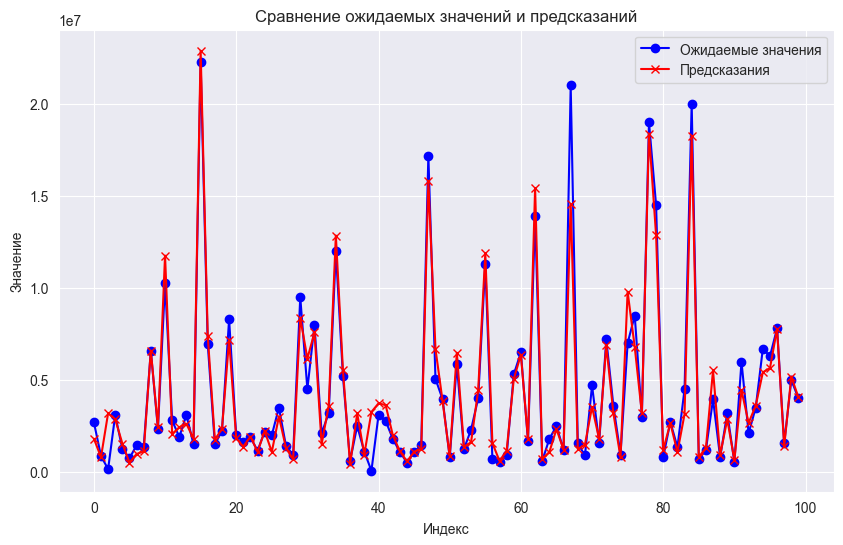

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[1000:1100], label='Ожидаемые значения', color='blue', linestyle='-', marker='o')
plt.plot(y_pred[1000:1100], label='Предсказания', color='red', linestyle='-', marker='x')

plt.title('Сравнение ожидаемых значений и предсказаний')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

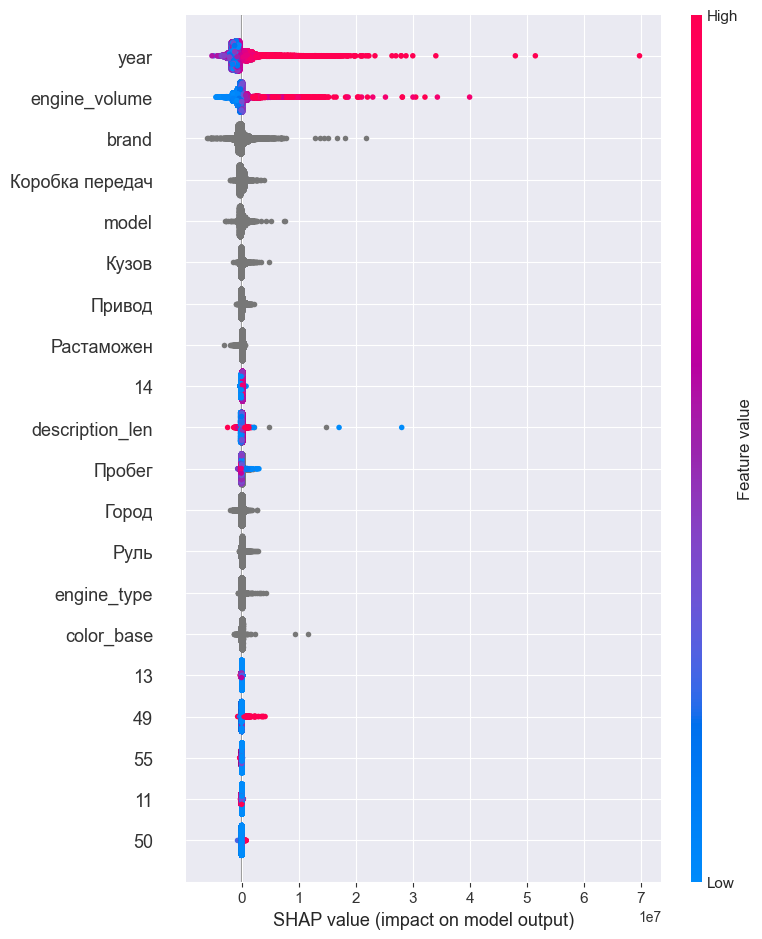

In [50]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Фичи текста не вносят большой вклад в модель

In [51]:
feature_importances = model.get_feature_importance(train_pool)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [52]:
feature_importance_df

,Feature,Importance
2,year,39.921727
10,engine_volume,29.183548
0,brand,12.370280
1,model,3.796719
4,Коробка передач,2.173232
...,...,...
25,10,0.000469
19,4,0.000000
16,1,0.000000
67,52,0.000000


# Прироста в целевой метрике не наблюдается, добавленные фичи не особо важны модели

# Пробуем сделать что-то вроде отбора по ключевым словам которые могут дать прирост цене таких как ГУР, кондиционер, кожа, срочность и т.п.

In [53]:
word_counts = (
    data['description_clean']
    .str.split(expand=True)
    .stack()
    .value_counts()
)

In [54]:
data['gur'] = data['description_clean'].str.contains('гур', case=False, na=False).astype(int)
data['TO'] = data['description_clean'].str.contains('техосмотр', case=False, na=False).astype(int)
data['leather'] = data['description_clean'].str.contains('кож', case=False, na=False).astype(int)
data['autorun'] = data['description_clean'].str.contains('автозапуск', case=False, na=False).astype(int)
data['cond'] = data['description_clean'].str.contains(r'\b(кондиционер|климат)\b', case=False, na=False).astype(int)
data['computer'] = data['description_clean'].str.contains('компьютер', case=False, na=False).astype(int)
data['sport'] = data['description_clean'].str.contains('спортивн', case=False, na=False).astype(int)

C:\Users\zloif\AppData\Local\Temp\ipykernel_28428\2589682425.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['cond'] = data['description_clean'].str.contains(r'\b(кондиционер|климат)\b', case=False, na=False).astype(int)


In [55]:
FEATURES = [col for col in data.columns if col not in  ['price', 'description', 'description_clean']]
TARGET = ['price']

In [56]:
X, y = data[FEATURES], data[TARGET]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [58]:
train_pool = Pool(X_train, y_train, cat_features=CAT_FEATURES)
valid_pool = Pool(X_test, y_test, cat_features=CAT_FEATURES)

In [59]:
model = CatBoostRegressor(random_state = 111)

In [60]:
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=100)
y_pred = model.predict(X_test)

Learning rate set to 0.102628
0:	learn: 5039529.5007016	test: 5503826.0128862	best: 5503826.0128862 (0)	total: 78.7ms	remaining: 1m 18s
100:	learn: 1804172.2811442	test: 2670213.0216190	best: 2670213.0216190 (100)	total: 8.52s	remaining: 1m 15s
200:	learn: 1590702.5261878	test: 2466507.8462986	best: 2466107.1907329 (199)	total: 17s	remaining: 1m 7s
300:	learn: 1456163.4500664	test: 2376095.0795439	best: 2375432.4936764 (299)	total: 25.4s	remaining: 58.9s
400:	learn: 1349321.1147221	test: 2277989.4140726	best: 2277989.4140726 (400)	total: 34s	remaining: 50.8s
500:	learn: 1266468.3196666	test: 2226052.5361683	best: 2226052.5361683 (500)	total: 42.7s	remaining: 42.5s
600:	learn: 1204078.7027920	test: 2191286.0311316	best: 2190978.7543234 (598)	total: 51.4s	remaining: 34.1s
700:	learn: 1155401.3061861	test: 2162847.9120609	best: 2162847.9120609 (700)	total: 1m	remaining: 25.7s
800:	learn: 1120434.9340193	test: 2147961.6772411	best: 2147775.6621829 (790)	total: 1m 8s	remaining: 17.1s
900:	l

In [61]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 588142.9091125372


 Опять же явного прироста от таких фичей нет.

In [62]:
feature_importances = model.get_feature_importance(train_pool)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [63]:
display(feature_importance_df)

,Feature,Importance
2,year,42.121095
10,engine_volume,27.904127
0,brand,14.369184
1,model,2.748139
5,Кузов,2.482341
4,Коробка передач,1.858568
14,description_len,1.808817
6,Привод,1.561842
9,Пробег,1.258040
3,Город,0.952687


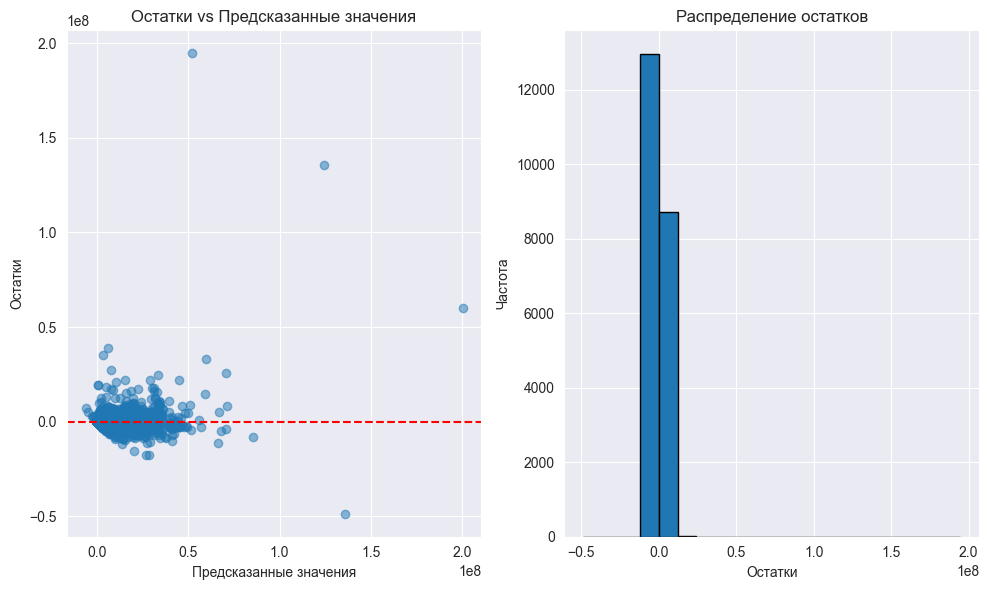

In [64]:
residuals = y_test.values.flatten() - y_pred

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Остатки vs Предсказанные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

В принципе по остаткам видно что у нас достаточно случайные ошибки и остатки распеределены возле 0.
Есть несколько выбросов которые, скорее всего связаны с выставленными за странные суммы авто. теми которые стоят за 260_000_000 млн и 550 тг. но в целом предсказательная способность не плохая для основной массы данных.

# Наиболее хороший показатель в бейзлайне дала модель без добавления признаков из текстов. Поэтому будем работать с ней.
В принципе можно было бы накинуть берта найти более интересные зависимости особенно с таким большим разбросом цены, но будто бы это не стоит того потому что зачастую пользователи вводящие текст в описание объявления повторяются со стандартным набором признаков авто.

А к тому же добавление слов которые могли бы дать информативный прирост не особо много и проверив их результат лучше сделать в бейзлайне не получилось.

Тут могла бы сыграть роль какая-нибудь обработка фото автомобиля. Помочь увидеть повреждения или что-то в этом роде. Или если бы продавцы писали это в объявлениях более честно.

оставим только гур, автозапуск и кожанный салон чтобы как-то отделить премиум сегмент от базы.

# Пробуем подобрать параметры после отбора признаков

In [96]:
def preprocess_text_simple(text):
    text = re.sub(r'[^а-яёәғқңөұүһіa-zА-ЯЁӘҒҚҢӨҰҮҺІA-Z0-9 ]', ' ', text.lower())
    tokens = text.split()
    clean_tokens = []
    all_stopwords = STOPS_RU.union(STOPS_KZ)
    for token in tokens:
        if token in all_stopwords or len(token) < 2:
            continue
        if re.search('[а-яё]', token):
            token = stemmer.stem(token)
        clean_tokens.append(token)
    return ' '.join(clean_tokens)

def final_preproc(df):
    df[['engine_volume', 'engine_type']] = df['Объем двигателя, л'].str.extract(r'([\d.]+)\s*\(([^)]+)\)')
    df['engine_volume'] = pd.to_numeric(data['engine_volume'])
    df[['color_base', 'metalic']] = df['Цвет'].str.split(' ', n=1, expand=True)
    df['metalic'] = df['metalic'].replace('металлик', 1).fillna(0).astype(int)
    df['Пробег'] = df['Пробег'].str.replace(r'\D', '', regex=True).replace('', np.nan).astype(float)
    df['description_len'] = df['description'].str.len()

    data['description_clean'] = data['description'].apply(lambda x: preprocess_text_simple(str(x)))

    data['gur'] = data['description_clean'].str.contains('гур', case=False, na=False).astype(int)
    data['leather'] = data['description_clean'].str.contains('кож', case=False, na=False).astype(int)
    data['autorun'] = data['description_clean'].str.contains('автозапуск', case=False, na=False).astype(int)


    columns_to_drop = [
        'Объем двигателя, л',
        'Цвет',
        'currency',
        'url',
        'VIN',
        'Наличие'
    ]

    cat_features = [
        'brand',
        'model',
        'Город',
        'Коробка передач',
        'Кузов',
        'Привод',
        'Растаможен',
        'Руль',
        'engine_type',
        'color_base',
        'metalic',
        'gur',
        'leather',
        'autorun'
    ]

    return df, columns_to_drop, cat_features

In [97]:
data = pd.read_csv('cars.csv', sep=';', encoding='UTF-16')
data, COLUMNS_TO_DROP, CAT_FEATURES = final_preproc(data)

C:\Users\zloif\AppData\Local\Temp\ipykernel_28428\694399337.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['metalic'] = df['metalic'].replace('металлик', 1).fillna(0).astype(int)


In [98]:
data.drop(COLUMNS_TO_DROP, axis=1, inplace=True)

In [99]:
FEATURES = [col for col in data.columns if col not in  ['price', 'description', 'description_clean']]
TARGET = ['price']

In [100]:
for col in CAT_FEATURES:
    data[col] = data[col].fillna('unk')

In [101]:
from sklearn.model_selection import TimeSeriesSplit

# Для подбора прогоним кросс валидацию

In [102]:
def get_error(data, model):
    tcv = TimeSeriesSplit()
    error = 0
    for i, (train_index, test_index) in enumerate(tcv.split(data)):

        X_train = data.loc[train_index, FEATURES].copy()
        X_test = data.loc[test_index, FEATURES].copy()
        y_train = data.loc[train_index, TARGET]
        y_test = data.loc[test_index, TARGET]

        train_pool = Pool(X_train, y_train, cat_features=CAT_FEATURES)
        valid_pool = Pool(X_test, y_test, cat_features=CAT_FEATURES)

        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=False)
        y_pred = model.predict(X_test)

        error += mean_absolute_error(y_test, y_pred)

    error /= tcv.n_splits
    return error

In [103]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Раскомментировать если хочется подбирать параметры)

In [104]:
# start_time = datetime.now()
# print(f"Start: {start_time}")
space_tree = {
    'depth': hp.quniform('depth', 4, 10, 1),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', np.log(1), np.log(10)),
    'min_child_samples': hp.quniform('min_child_samples', 1, 20, 1),
    'border_count': hp.quniform('border_count', 32, 255, 1)
}
def objective_tree(params):
    model = CatBoostRegressor(
        iterations=300,
        depth=int(params['depth']),
        l2_leaf_reg=params['l2_leaf_reg'],
        min_child_samples=int(params['min_child_samples']),
        border_count=int(params['border_count']),
        random_state=111
    )

    error = get_error(data, model)

    return error

# trials_tree = Trials()
# best_tree = fmin(fn=objective_tree, space=space_tree, algo=tpe.suggest, max_evals=20, trials=trials_tree)

# print(f"End best tree optimization: {datetime.now() - start_time}")

space_general = {
    'iterations': hp.quniform('iterations', 100, 1000, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
}
def objective_general(params):
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        depth=int(best_tree['depth']),
        l2_leaf_reg=best_tree['l2_leaf_reg'],
        border_count=int(best_tree['border_count']),
        random_state=111
    )
    error = get_error(data, model)
    return error

# trials_general = Trials()
# best_general = fmin(fn=objective_general, space=space_general, algo=tpe.suggest, max_evals=10, trials=trials_general)
# print(f"End optimization: {datetime.now() - start_time}")
# print(best_tree, best_general)

best_tree = {'border_count': np.float64(157.0), 'depth': np.float64(9.0), 'l2_leaf_reg': np.float64(2.53768741776962), 'min_child_samples': np.float64(13.0)}

best_general = {'iterations': np.float64(773.0), 'learning_rate': np.float64(0.12085209448822143), 'subsample': np.float64(0.8512984014644789)}

Выделил чтобы не прогонять несколько раз

In [105]:
best_tree = {'border_count': np.float64(157.0), 'depth': np.float64(9.0), 'l2_leaf_reg': np.float64(2.53768741776962),
             'min_child_samples': np.float64(13.0)}

best_general = {'iterations': np.float64(773.0), 'learning_rate': np.float64(0.12085209448822143),
                'subsample': np.float64(0.8512984014644789)}

In [106]:
X, y = data[FEATURES], data[TARGET]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [108]:
train_pool = Pool(X_train, y_train, cat_features=CAT_FEATURES)
valid_pool = Pool(X_test, y_test, cat_features=CAT_FEATURES)

In [109]:
model = CatBoostRegressor(**best_tree, **best_general, random_state = 111)

In [110]:
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=100)
y_pred = model.predict(X_test)

0:	learn: 4955559.7858518	test: 5433077.0655890	best: 5433077.0655890 (0)	total: 158ms	remaining: 2m 1s
100:	learn: 1416405.3757384	test: 2381382.7211005	best: 2381382.7211005 (100)	total: 17.5s	remaining: 1m 56s
200:	learn: 1131682.6664437	test: 2191429.5629704	best: 2191413.9155947 (199)	total: 34.8s	remaining: 1m 39s
300:	learn: 985710.6148202	test: 2132025.3327680	best: 2132025.3327680 (300)	total: 53.4s	remaining: 1m 23s
400:	learn: 903331.4232745	test: 2103410.4481930	best: 2103410.4481930 (400)	total: 1m 11s	remaining: 1m 6s
500:	learn: 829565.2770843	test: 2086862.4378439	best: 2086862.4378439 (500)	total: 1m 27s	remaining: 47.3s
600:	learn: 779292.9497030	test: 2075402.0737229	best: 2075139.3870129 (592)	total: 1m 43s	remaining: 29.5s
700:	learn: 738097.4515808	test: 2068705.5977613	best: 2068705.5977613 (700)	total: 2m	remaining: 12.3s
772:	learn: 710307.0929916	test: 2063725.8738177	best: 2063659.2781556 (765)	total: 2m 12s	remaining: 0us

bestTest = 2063659.278
bestIteratio

In [111]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 540281.0561234207


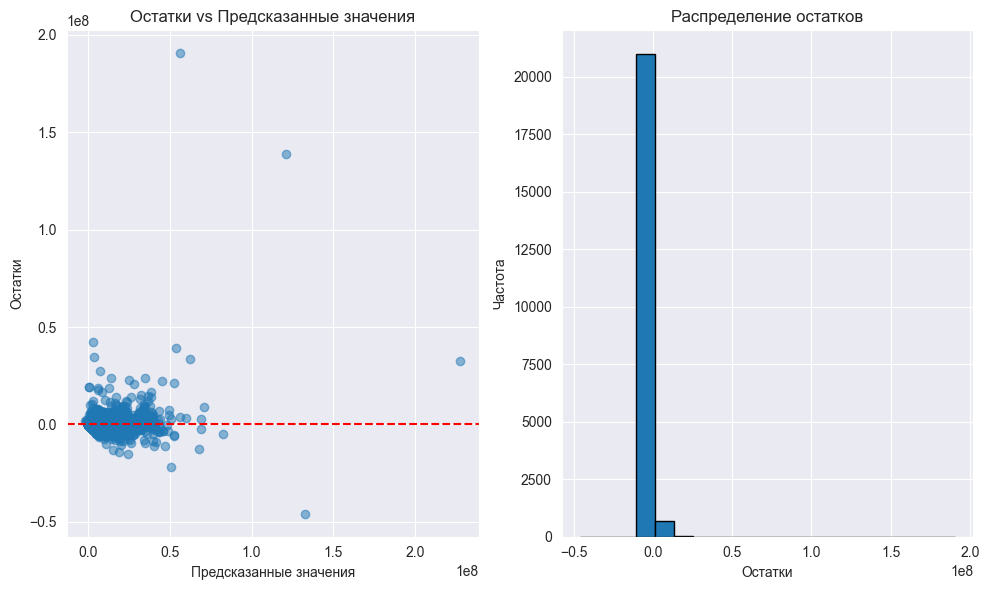

In [112]:
residuals = y_test.values.flatten() - y_pred

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Остатки vs Предсказанные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

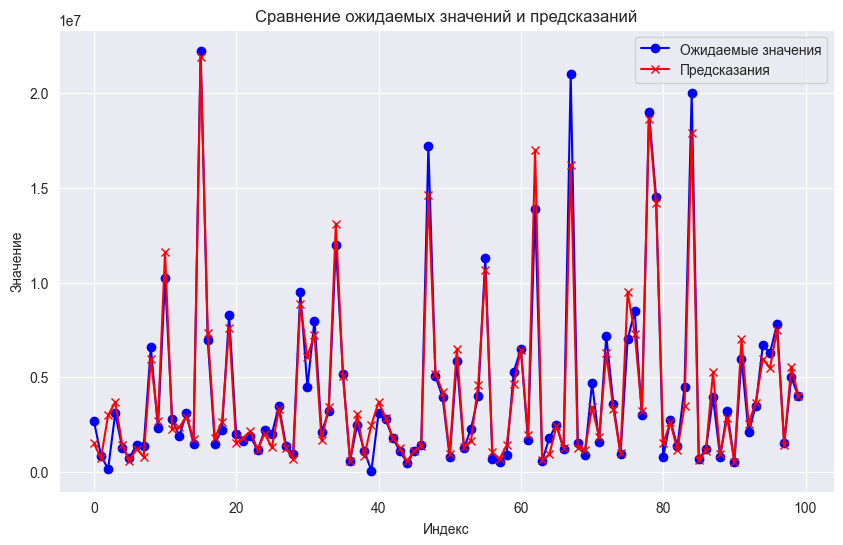

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[1000:1100], label='Ожидаемые значения', color='blue', linestyle='-', marker='o')
plt.plot(y_pred[1000:1100], label='Предсказания', color='red', linestyle='-', marker='x')

plt.title('Сравнение ожидаемых значений и предсказаний')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

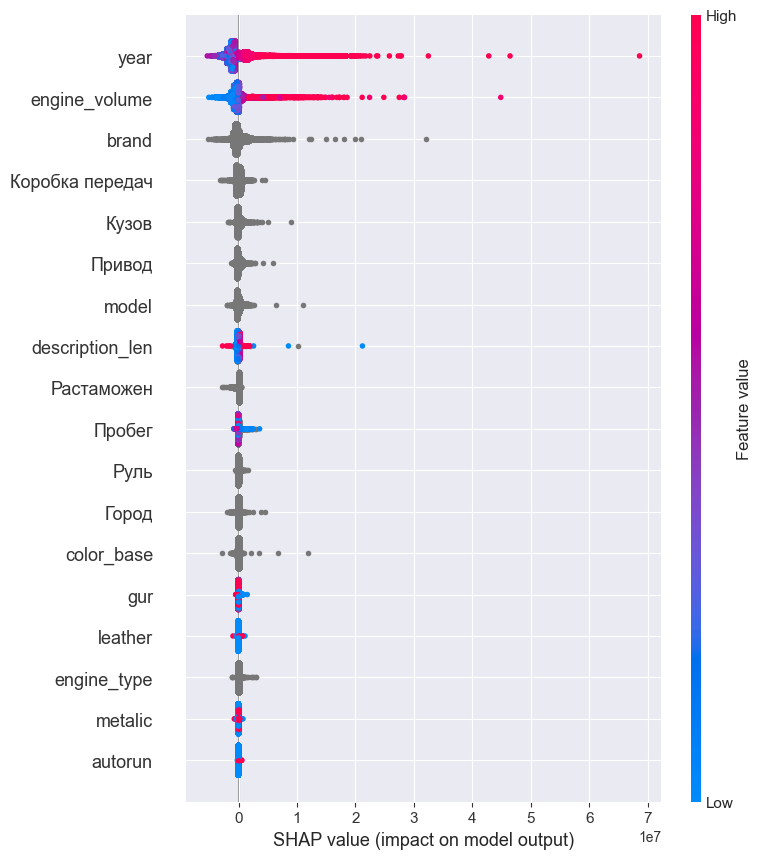

In [114]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

По итогу в конечную модель попали:
год - чем новее тем дороже,
объем двигателя - чем больше тем дороже,
бренд отдельные бренды дороже,
КП,
кузов,
привод,
модель,
длина описания - длинные описания больше уводят модель в сторону большей цены,
растаможенн ли авто,
пробег - низкий пробег высокая стоимость,
руль,
город,
цвет авто,
наличие гур,
кожа,
тип движка,
тип краски ((не)металик),
наличие автозапуска.

Ключевая метрика выбранная для предсказаний: MAE.
Выбор пал на нее так как она проста для интерпретации в текущей задаче, устойчива к выбросам и экстремальным значениям таргета.

Получилось достичь ошибки в 540_000 тенге. В случае с достаточно большим количеством разноплановых авто из разных сегментов является хорошим результатом. В наборе присутствуест достаточно большое отклонение цен в 5.5 млн тенге.
В относительных величинах в районе 16% ошибка относительно среднего. Относительно медианы ~25%.

В теории для таких предсказаний могут быть полезны доп фичи автомобилей взятые не от владельцев а из какой-либо истории, такие как число аварий, число владельцев, какие-то доп признаки указывающие на количество возможных раз которые автомобиль продавался и его предыдущую цену. Если есть статистика по ценам на авто за предыдущие годы (продавалась раньше), можно внести это в модель.
Опять же для пробы улучшения можно накатить берта и проверить насколько он сможет выделить интересные взаимосвязи в описании.
Добавить фичи из фото авто.

Можно докинуть какие-то временные фичи или что-то подобное, например, цена схожих авто на площадке, или средняя цена авто этой марки этого года, изменение средней цены за последние несколько лет, сколько авто находится в продаже по времени. Вариантов много и в теории они должны дать свой вклад.

среднюю цену можно считать по трейну. Я проверял в принципе приросты есть дает чуть меньше 1% прироста к точности. Но будто бы лучше это считать в целом для авто на рынке а не просто по трейну, м.б. и приросты будут больше

# Анализ динамики изменения стоимости(амортизация)

Как я уже писал выше предположим, что данные собраны на 2019 год.

In [84]:
YEAR = 2019

In [85]:
data['car_ages'] = YEAR - data['year']

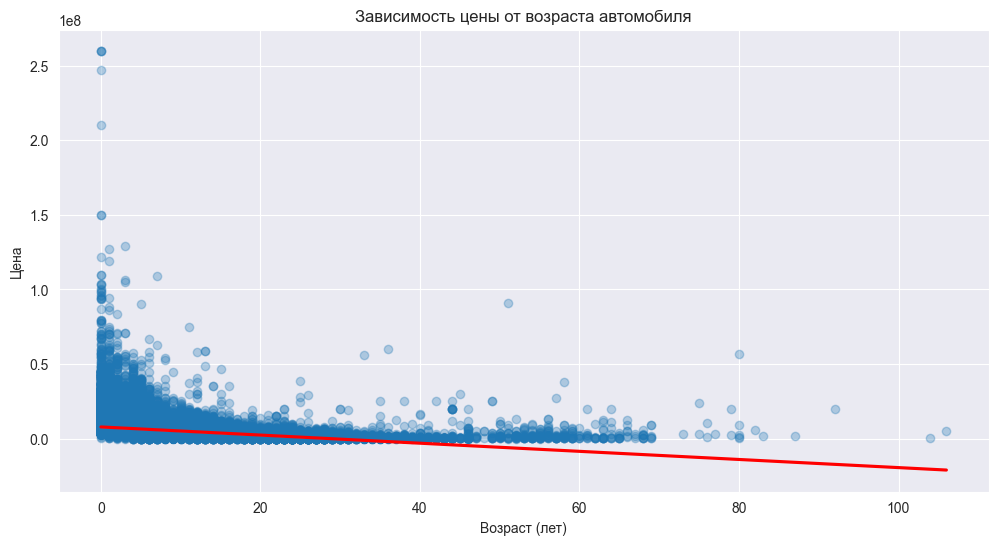

In [86]:
plt.figure(figsize=(12, 6))
sns.regplot(x='car_ages', y='price', data=data,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Зависимость цены от возраста автомобиля')
plt.ylabel('Цена')
plt.xlabel('Возраст (лет)')
plt.show()

In [87]:
brand_age_price = data.groupby(['brand', 'car_ages'])['price'].mean().reset_index()

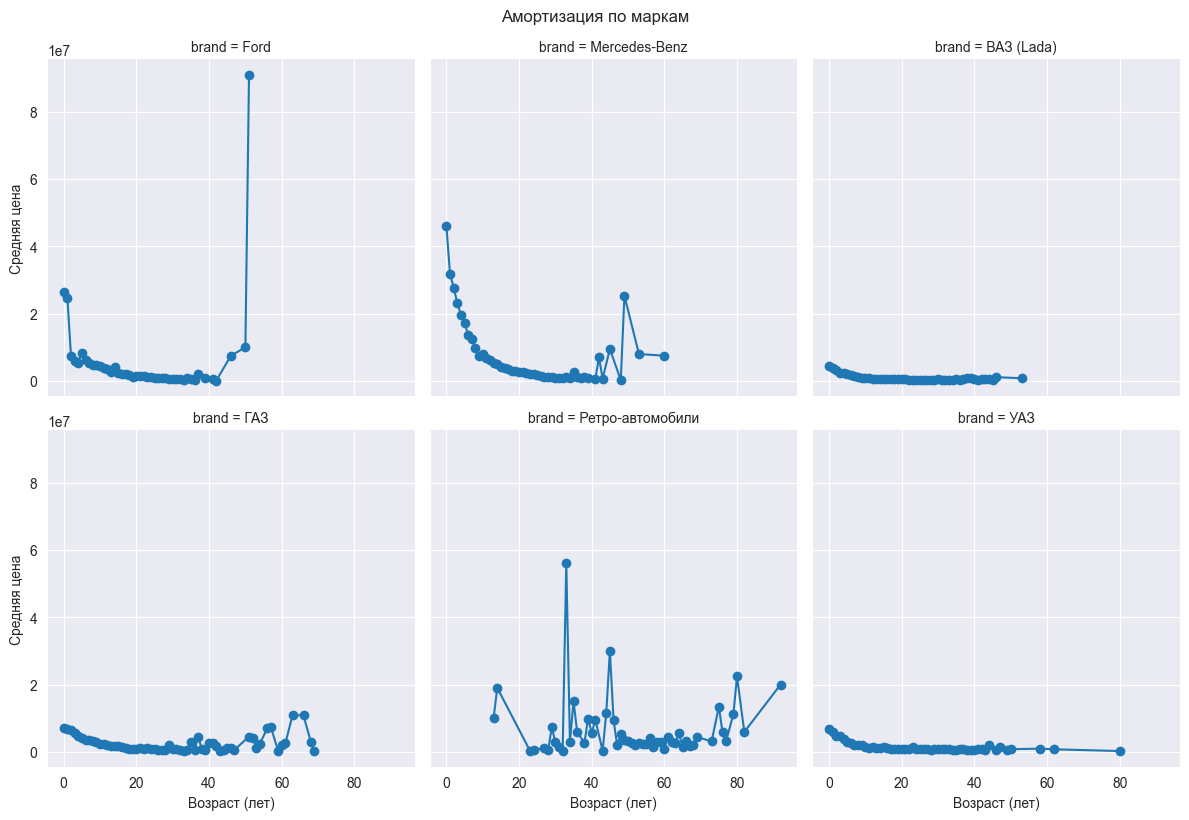

In [88]:
g = sns.FacetGrid(brand_age_price[brand_age_price['brand'].isin(brand_age_price['brand'].value_counts().head(6).index)], col="brand", col_wrap=3, height=4)
g.map(plt.plot, "car_ages", "price", marker="o")
g.set_axis_labels("Возраст (лет)", "Средняя цена")
g.fig.suptitle("Амортизация по маркам", y=1.02)
plt.show()

Если взять топ 6 брендов автомобилей и их средние цены на рынке, можно увидеть, что все они (кроме ретро, это в принципе отдельная история) имеют четкий тренд резкого падения средней цены в первые несколько лет эксплуатации. А затем, цены стабилизируются на более низком уровне.

Однако имеются опять же старые автомобили которые из-за раритетности могу стоить очень дорого и поэтому появляются скачки на таких авто. Особенно характерно видно у Ford 50 летней давности или на старых мерседесах. На ВАЗ-е таких скачков не наблюдается.

Попробуем выделить тренды к снижению цены

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [91]:
features = data[['brand', 'engine_volume','Город', 'Кузов', 'Привод', 'engine_type', 'year', 'Коробка передач', 'Пробег']]
num_cols = features.select_dtypes(include=[np.number]).columns
features[num_cols] = features[num_cols].fillna(-999.0)

obj_cols = features.select_dtypes(include=['object']).columns
features[obj_cols] = features[obj_cols].fillna('unk')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand', 'Кузов', 'Привод', 'engine_type', 'Город', 'Коробка передач']),
        ('num', StandardScaler(), ['engine_volume', 'year', 'Пробег'])
    ])

C:\Users\zloif\AppData\Local\Temp\ipykernel_28428\2292906573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[num_cols] = features[num_cols].fillna(-999.0)
C:\Users\zloif\AppData\Local\Temp\ipykernel_28428\2292906573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[obj_cols] = features[obj_cols].fillna('unk')


In [92]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=111))
])

data['cluster'] = pipeline.fit_predict(features)

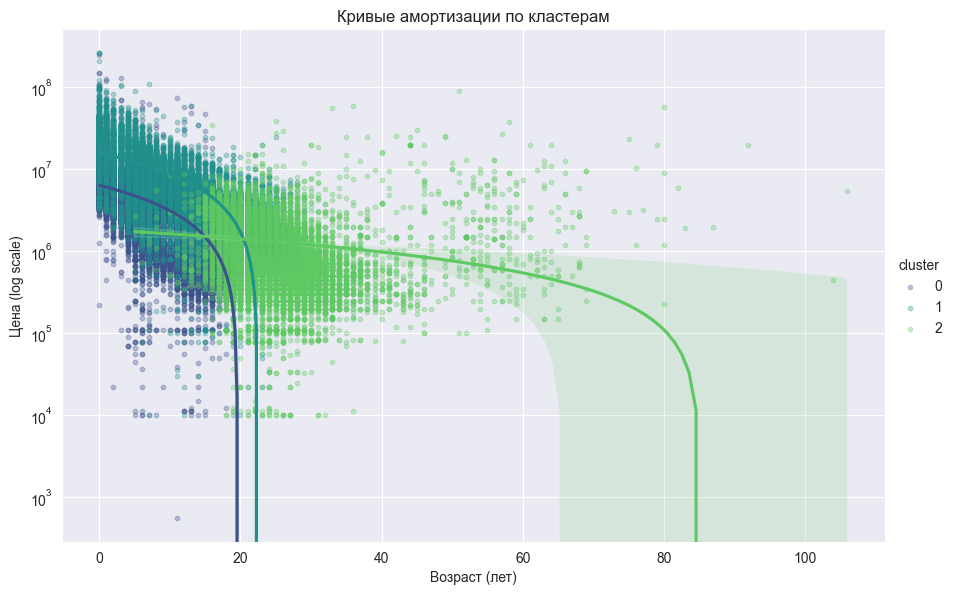

In [93]:
g = sns.lmplot(
    data=data,
    x='car_ages',
    y='price',
    hue='cluster',
    scatter_kws={'alpha': 0.3, 's': 10},
    height=6,
    aspect=1.5,
    palette='viridis'
)

g.set(yscale='log')
plt.title('Кривые амортизации по кластерам')
plt.xlabel('Возраст (лет)')
plt.ylabel('Цена (log scale)')
plt.show()

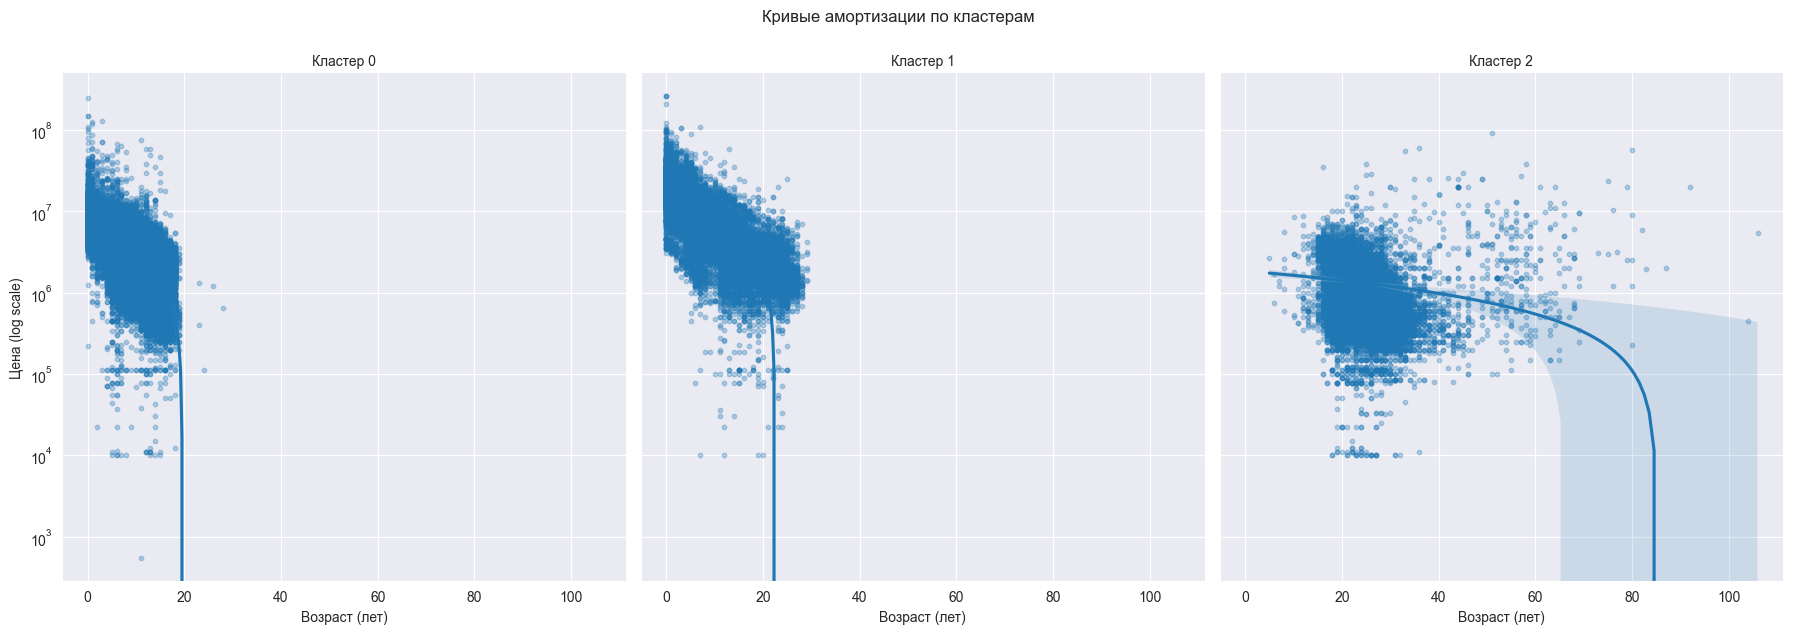

In [94]:
g = sns.lmplot(
    data=data,
    x='car_ages',
    y='price',
    col='cluster',
    scatter_kws={'alpha': 0.3, 's': 10},
    height=6,
    aspect=1,
    palette='viridis',
    fit_reg=True
)
g.set(yscale='log')
g.set_axis_labels('Возраст (лет)', 'Цена (log scale)')
g.set_titles('Кластер {col_name}')
plt.suptitle('Кривые амортизации по кластерам', y=1.05)
plt.show()

In [95]:
# Анализ кластеров
cluster_stats = data.groupby('cluster').agg({
    'brand': lambda x: x.mode()[0],
    'engine_volume': 'mean',
    'year': 'mean',
    'price': 'mean',
    'Пробег': 'mean'
})

print("Характеристики кластеров:")
display(cluster_stats)

Характеристики кластеров:


,brand,engine_volume,year,price,Пробег
cluster,,,,,
0,ВАЗ (Lada),1.969875,2009.929488,3.433833e+06,134087.155178
1,Toyota,3.105710,2006.894887,7.313947e+06,151955.943408
2,Mercedes-Benz,2.175854,1994.166913,1.310800e+06,468050.779417


Исходя из анализа кластеров:

### Кластер 1:
* Преобладающая марка *ВАЗ*
* средний объем двигателя 1.9 (самый маленький среди кластеров)
* Цена средняя 3.5 млн тенге
* год выпуска 2009
* Пробег небольшой 134000
Кривая амортизации самая крутая: автомобили быстро теряют стоимость в первые годы эксплуатации.
После 10-15 лет цена на низком уровне.
Характерно для массовых бюджетных автомобилей, быстрое обесценивание и нет коллекционной ценности.
----
### Кластер 2:
* Преобладающая марка *Toyota*
* средний объем двигателя 3.1 (самый большой среди кластеров)
* Ценовой сегмент дорогой. (7.3 млн тенге)
* Год выпуска 2006
* Пробег небольшой 151000
Кривая амортизации более пологая, потеря в цене с годами более медленная в сравнении с другими кластерами.
Сюда относятся надежные автомобили из высокого ценового сегмена (Toyota - типичный представитель)
После 15-20 лет цена авто остается на уровень выше массовых брендов.
----
### Кластер 3:
* Преобладающая марка *Mersedes-benz*
* Средний объем двигателя 2.1
* Цена низкая 1.7 млн тенге, но есть дорогие представители (раритетные авто)
* год выпуска 1994
* Пробег большой
В этот кластер попали старые автомобили старше 20 лет (в основной массе) с большим пробегом.
Кривая амортизации для них пологая, с годами их цены стабилизировались и остается на минимальном/очень низком уровне. Опять же исключая раритетные авто, которые с годами становятся дороже.